In [5]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Read in the master dataframe
dataframe = pd.read_pickle('merged_dataset_07Jun2020.pkl')
# Remove target values less than -1
dataframe = dataframe.drop(dataframe[dataframe['Airpointer_NO2[ppb]'] < -1].index)
# Drop the first two outliers
dataframe = dataframe.iloc[2:]
# Print the head of the dataframe
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],NO2[ppb],Pressure[Pa],Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent],Airpointer_PM2.5_conc[ppb]
Timestamp,,,,,,,,,,,,,,,,,
2020-05-06 15:00:00,22.104889,19.616056,1.189444,1.930556,2.090000,52.154389,158.829056,99188.698889,1.483333,3.901500,5.595000,40.472333,15.562333,11.270000,12.369500,27.624167,4.290667
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,135.239611,99140.480000,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,12.851333,26.497000,4.626500
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,118.911944,99111.335556,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,12.170000,27.646167,5.165667
2020-05-06 18:00:00,18.713167,20.979889,1.914444,2.970556,3.246667,53.447722,98.456389,99124.504444,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,11.409000,28.912333,5.013333
2020-05-06 19:00:00,15.544500,24.716389,2.207222,3.381667,3.666111,53.151778,91.426611,99156.430556,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,10.577667,26.920333,3.426167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.253500,55.292333,4.650000,6.663889,7.155000,43.241889,72.902000,99395.750556,1.871583,12.394950,14.266483,35.526850,24.393067,14.080850,991.866117,14.362150,10.313250
2020-06-02 10:00:00,19.055667,54.171833,10.448333,15.653889,17.139444,44.864389,76.390000,99298.217222,2.176050,7.480200,9.656100,44.714200,19.079400,13.009233,991.048683,16.280417,6.067050
2020-06-02 11:00:00,22.666278,46.194778,3.690556,5.188333,5.552778,43.138611,74.345278,99197.744444,2.018567,6.709750,8.636333,48.688017,20.483817,13.730200,990.149050,18.828600,6.751233


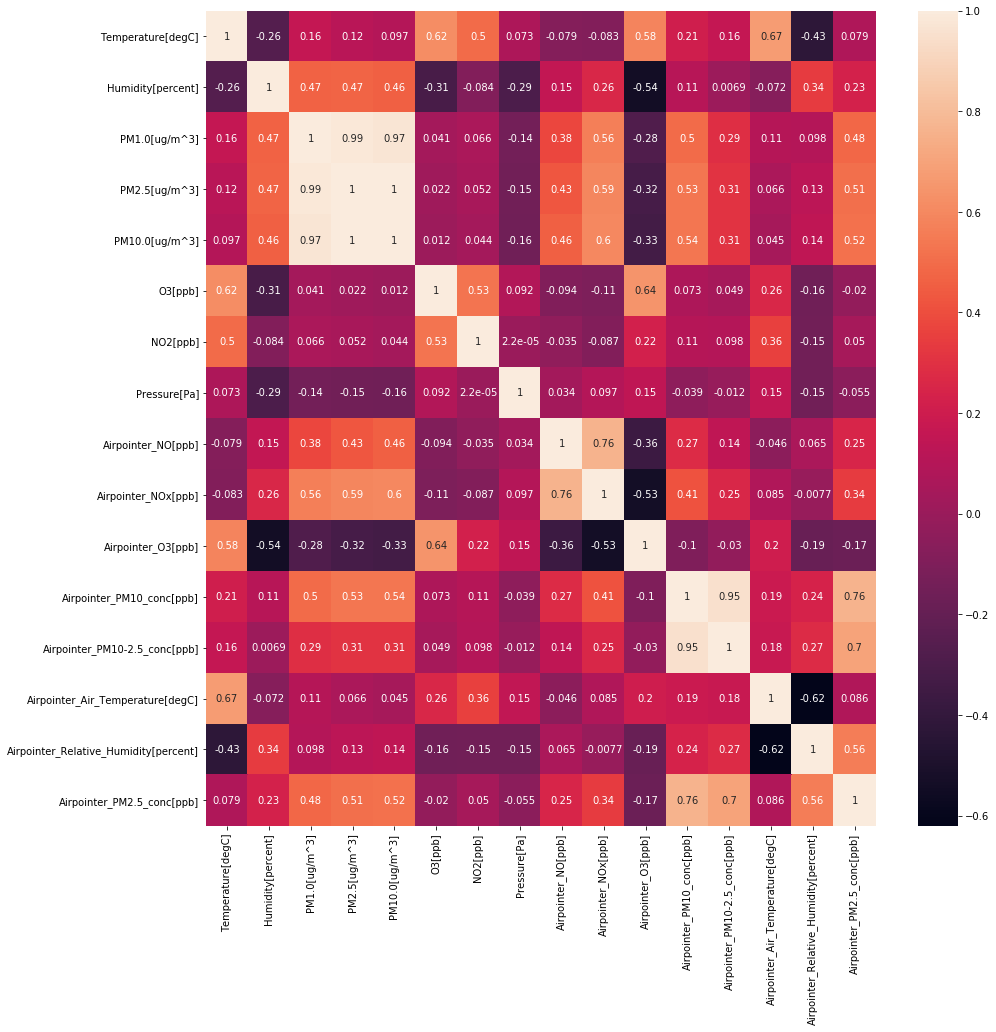

In [10]:
dataframe_new = dataframe.drop(columns=['Airpointer_NO2[ppb]'])
corrMatrix = dataframe_new.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

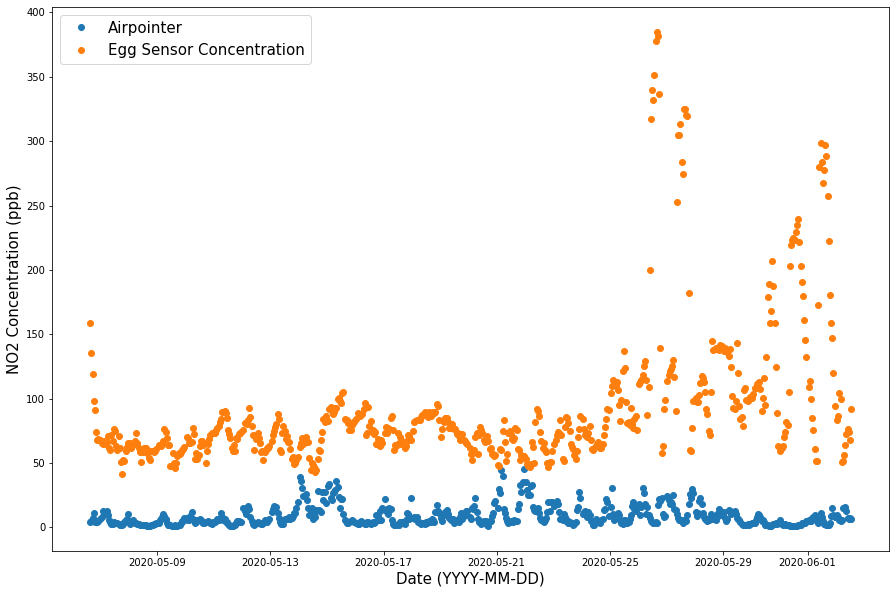

In [11]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(dataframe.index.to_series(), dataframe['NO2[ppb]'], 'o', label="Egg Sensor Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [16]:
dataframe[dataframe['NO2[ppb]'] > 200]

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],NO2[ppb],Pressure[Pa],Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent],Airpointer_PM2.5_conc[ppb]
Timestamp,,,,,,,,,,,,,,,,,
2020-05-26 10:00:00,36.382611,36.417222,10.710556,14.648333,15.300000,68.706722,200.235500,99940.988333,1.532833,7.421917,8.771867,56.231000,31.171900,19.593767,998.863700,28.345650,11.578733
2020-05-26 11:00:00,39.103167,31.602944,9.625000,12.722778,13.261111,78.184944,317.079000,99940.898889,0.703983,4.862433,5.566417,58.709983,24.388750,14.018933,998.649567,29.096050,10.371617
2020-05-26 12:00:00,38.900167,32.123556,9.496667,12.262778,12.667222,81.230944,339.539222,99917.447222,0.500167,3.792967,4.293083,60.106083,23.879633,13.432883,998.453933,30.079133,10.447733
2020-05-26 13:00:00,38.511167,32.888167,9.499444,12.486667,12.893333,80.622000,332.290444,99895.916667,0.582517,3.534917,4.121550,60.270667,23.810583,13.348650,997.995950,30.360783,10.462417
2020-05-26 14:00:00,38.842722,31.603444,9.223333,12.225000,12.573333,81.554778,351.358944,99849.566667,0.645050,3.442617,4.087617,58.899750,25.698917,16.443183,997.492133,31.012317,9.253850
2020-05-26 15:00:00,39.666167,28.688944,7.545556,9.847222,10.154444,84.352556,377.588889,99798.137778,0.753150,4.006767,4.585367,58.402650,23.584700,14.394750,996.999017,31.382883,9.191717
2020-05-26 16:00:00,39.876167,28.124667,6.920556,9.279444,9.671667,86.243500,384.890889,99746.196667,0.620417,3.661600,4.272750,57.686983,23.263817,13.917017,996.419400,31.256000,9.346517
2020-05-26 17:00:00,39.697389,27.790778,6.981667,9.257222,9.591111,85.489778,381.626889,99686.120000,3.101050,17.246317,21.497617,49.501567,23.303083,13.485183,996.379783,29.766967,9.817783
2020-05-26 18:00:00,36.579389,32.798111,9.577222,12.651667,13.154444,86.814611,336.517333,99693.667222,2.781167,21.649733,23.772000,45.215850,24.530950,13.190483,996.619650,24.880650,11.339850


In [24]:
# Remove the outliers in the dataset
dataframe = dataframe[(np.abs(stats.zscore(dataframe['NO2[ppb]']))) < 3]

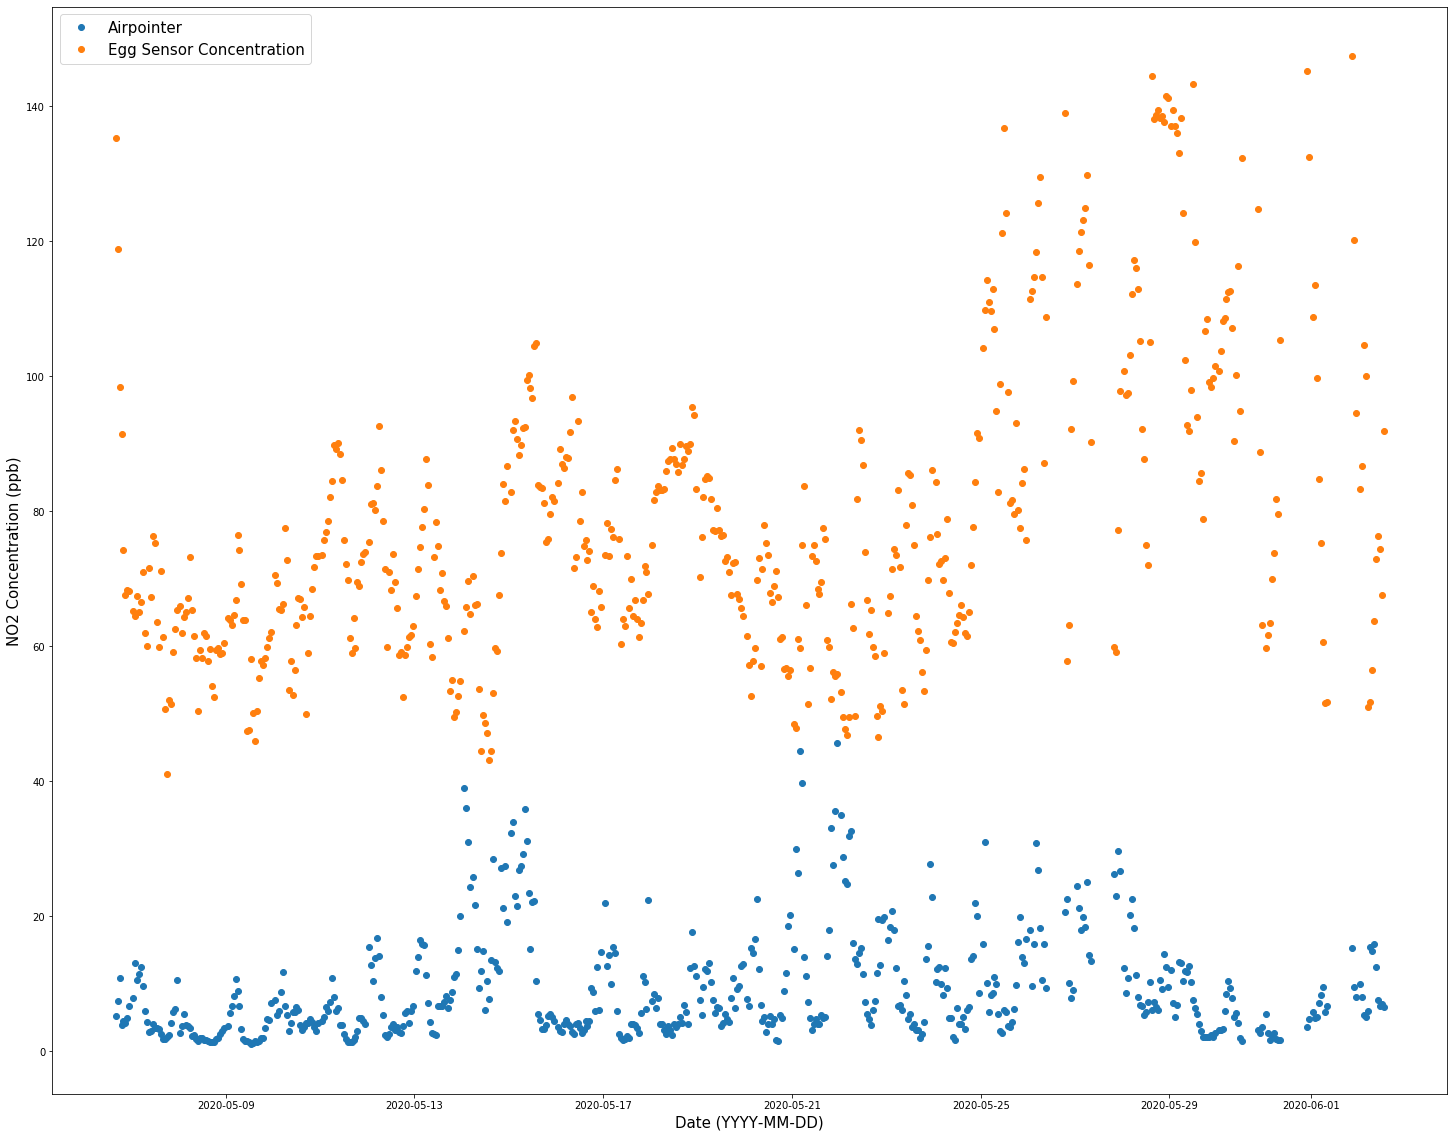

In [26]:
# Plot the time series graph
plt.figure(figsize=(25,20))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(dataframe.index.to_series(), dataframe['NO2[ppb]'], 'o', label="Egg Sensor Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [16]:
egg_1 = pd.read_pickle('egg_1_compiled.pkl')
egg_2 = pd.read_pickle('egg_2_compiled.pkl')
egg_4 = pd.read_pickle('egg_4_compiled.pkl')

In [10]:
egg_1

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
Timestamp,,,,,,,,,,
2020-05-06 13:00:00,20.520000,20.116667,3.166667,3.666667,4.000000,142.300000,1.421641,1935.236667,1.410120,99261.900000
2020-05-06 14:00:00,17.968333,24.757292,13.868750,15.925000,16.810417,63.958958,1.423080,263.038333,1.422146,99264.718750
2020-05-06 15:00:00,22.348833,19.432667,1.673333,2.333333,2.475000,60.012667,1.423583,95.994500,1.423568,99188.643333
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000
...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,17.769333,56.769000,4.976667,6.965000,7.448333,42.764333,1.423516,45.984500,1.423708,99397.595000
2020-06-02 10:00:00,18.665833,55.354500,12.606667,18.260000,20.106667,44.410500,1.423566,60.210000,1.423650,99301.313333
2020-06-02 11:00:00,22.390833,46.859167,4.021667,5.456667,5.803333,43.110333,1.423955,70.113000,1.423761,99201.498333


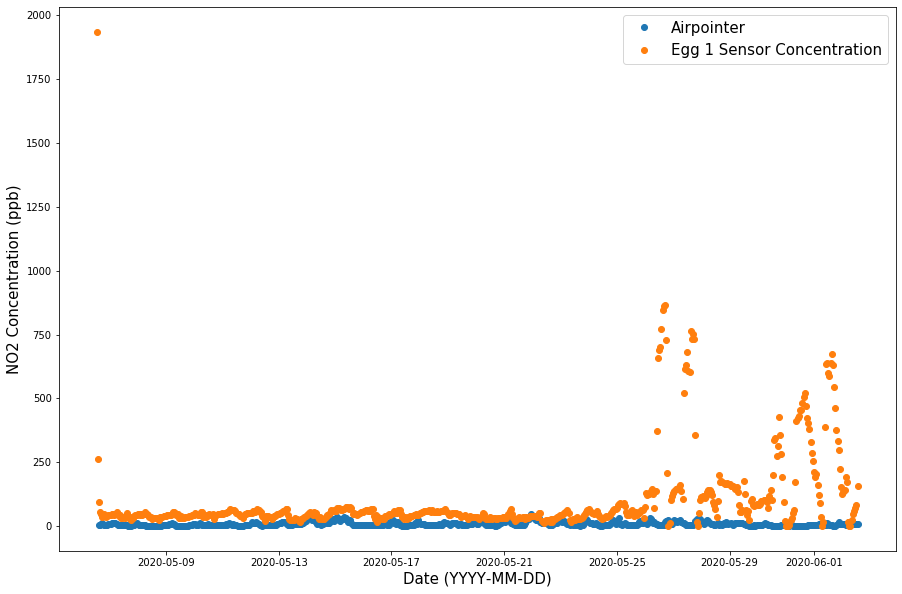

In [12]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(egg_1.index.to_series(), egg_1['NO2[ppb]'], 'o', label="Egg 1 Sensor Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

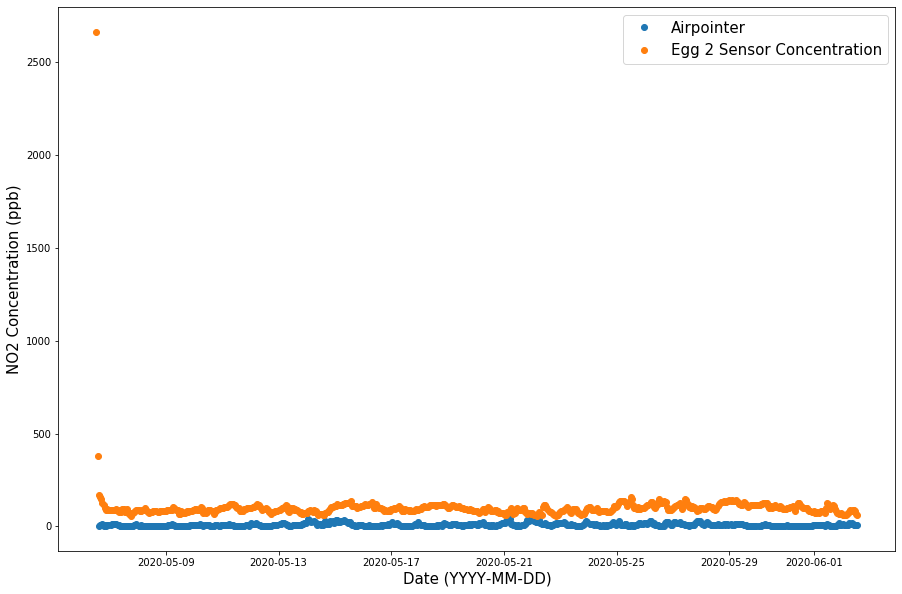

In [18]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(egg_1.index.to_series(), egg_2['NO2[ppb]'], 'o', label="Egg 2 Sensor Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

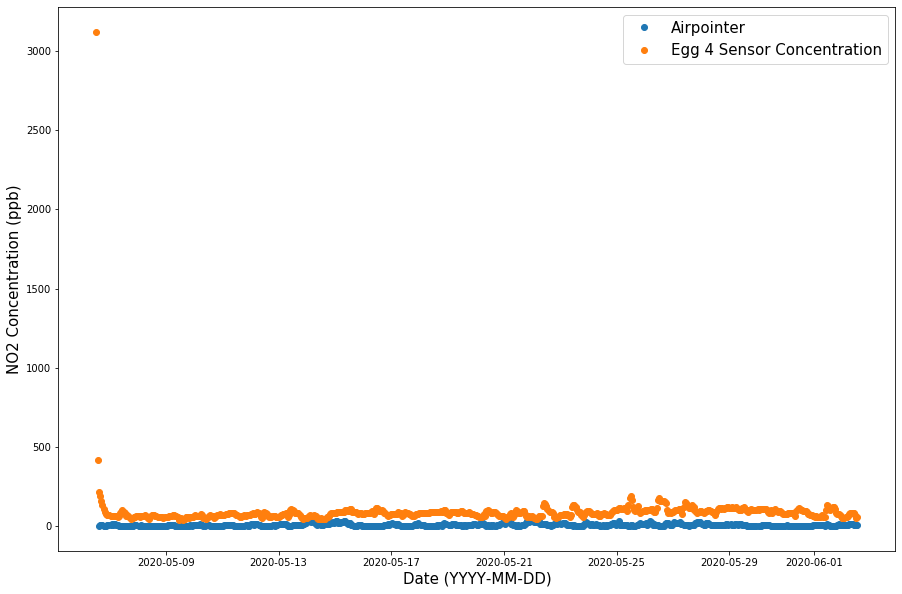

In [17]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(egg_1.index.to_series(), egg_4['NO2[ppb]'], 'o', label="Egg 4 Sensor Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [22]:
df3 = pd.concat((pd.read_pickle('egg_2_compiled.pkl'), pd.read_pickle('egg_4_compiled.pkl')))
merged_dataset = df3.groupby(df3.index).mean()
merged_dataset

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Unnamed: 14,Unnamed: 15
Timestamp,,,,,,,,,,,,
2020-05-06 13:00:00,19.725000,24.305000,0.750000,1.500000,1.500000,142.275000,1.422648,2892.590000,1.402938,99266.250000,NaN,NaN
2020-05-06 14:00:00,18.134519,24.615000,1.111538,1.998077,2.217308,55.643654,1.424299,400.426538,1.419446,99265.210577,NaN,NaN
2020-05-06 15:00:00,21.982917,19.707750,0.947500,1.729167,1.897500,48.225250,1.424734,190.246333,1.421011,99188.726667,NaN,NaN
2020-05-06 16:00:00,21.628167,19.348167,1.149167,2.002500,2.236667,48.434000,1.424704,174.688667,1.421089,99141.685833,NaN,NaN
2020-05-06 17:00:00,21.518667,18.971083,1.468333,2.446667,2.685833,48.384667,1.424698,153.747667,1.421219,99112.908333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.495583,54.554000,4.486667,6.513333,7.008333,43.480667,1.424575,86.360750,1.421546,99394.828333,NaN,NaN
2020-06-02 10:00:00,19.250583,53.580500,9.369167,14.350833,15.655833,45.091333,1.424596,84.480000,1.421589,99296.669167,NaN,NaN
2020-06-02 11:00:00,22.804000,45.862583,3.525000,5.054167,5.427500,43.152750,1.424899,76.461417,1.421809,99195.867500,NaN,NaN


In [23]:
airpointer_dataframe = pd.read_pickle('airpointer_07Jun2020.pkl')
airpointer_dataframe

,NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,
2020-05-06 13:00:00,1.405500,3.092333,4.498500,39.439667,14.807833,10.762833,4.045167,12.164500,29.069333
2020-05-06 14:00:00,1.235167,2.711000,3.915167,40.489167,12.815500,8.869667,3.944333,12.281333,28.194667
2020-05-06 15:00:00,1.483333,3.901500,5.595000,40.472333,15.562333,11.270000,4.290667,12.369500,27.624167
2020-05-06 16:00:00,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,1.871583,12.394950,14.266483,35.526850,24.393067,14.080850,10.313250,991.866117,14.362150
2020-06-02 10:00:00,2.176050,7.480200,9.656100,44.714200,19.079400,13.009233,6.067050,991.048683,16.280417
2020-06-02 11:00:00,2.018567,6.709750,8.636333,48.688017,20.483817,13.730200,6.751233,990.149050,18.828600


In [24]:
merged_dataset['Airpointer_NO[ppb]'] = airpointer_dataframe['NO']
merged_dataset['Airpointer_NO2[ppb]'] = airpointer_dataframe['NO2']
merged_dataset['Airpointer_NOx[ppb]'] = airpointer_dataframe['NOx']
merged_dataset['Airpointer_O3[ppb]'] = airpointer_dataframe['O3']
merged_dataset['Airpointer_PM10_conc[ppb]'] = airpointer_dataframe['PM10_conc']
merged_dataset['Airpointer_PM10-2.5_conc[ppb]'] = airpointer_dataframe['PM10-2.5_conc']
merged_dataset['Airpointer_PM2.5_conc[ppb]'] = airpointer_dataframe['PM2.5_conc']
merged_dataset['Airpointer_Air_Temperature[degC]'] = airpointer_dataframe['Air_Temperature']
merged_dataset['Airpointer_Relative_Humidity[percent]'] = airpointer_dataframe['Relative_Humidity']

In [25]:
merged_dataset

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],...,Unnamed: 15,Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_PM2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-06 13:00:00,19.725000,24.305000,0.750000,1.500000,1.500000,142.275000,1.422648,2892.590000,1.402938,99266.250000,...,NaN,1.405500,3.092333,4.498500,39.439667,14.807833,10.762833,4.045167,12.164500,29.069333
2020-05-06 14:00:00,18.134519,24.615000,1.111538,1.998077,2.217308,55.643654,1.424299,400.426538,1.419446,99265.210577,...,NaN,1.235167,2.711000,3.915167,40.489167,12.815500,8.869667,3.944333,12.281333,28.194667
2020-05-06 15:00:00,21.982917,19.707750,0.947500,1.729167,1.897500,48.225250,1.424734,190.246333,1.421011,99188.726667,...,NaN,1.483333,3.901500,5.595000,40.472333,15.562333,11.270000,4.290667,12.369500,27.624167
2020-05-06 16:00:00,21.628167,19.348167,1.149167,2.002500,2.236667,48.434000,1.424704,174.688667,1.421089,99141.685833,...,NaN,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,21.518667,18.971083,1.468333,2.446667,2.685833,48.384667,1.424698,153.747667,1.421219,99112.908333,...,NaN,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.495583,54.554000,4.486667,6.513333,7.008333,43.480667,1.424575,86.360750,1.421546,99394.828333,...,NaN,1.871583,12.394950,14.266483,35.526850,24.393067,14.080850,10.313250,991.866117,14.362150
2020-06-02 10:00:00,19.250583,53.580500,9.369167,14.350833,15.655833,45.091333,1.424596,84.480000,1.421589,99296.669167,...,NaN,2.176050,7.480200,9.656100,44.714200,19.079400,13.009233,6.067050,991.048683,16.280417
2020-06-02 11:00:00,22.804000,45.862583,3.525000,5.054167,5.427500,43.152750,1.424899,76.461417,1.421809,99195.867500,...,NaN,2.018567,6.709750,8.636333,48.688017,20.483817,13.730200,6.751233,990.149050,18.828600


In [30]:
merged_dataset = merged_dataset.drop(columns=['Unnamed: 14', 'Unnamed: 15'])

In [31]:
# Read in the master dataframe
dataframe = merged_dataset
# Remove target values less than -1
dataframe = dataframe.drop(dataframe[dataframe['Airpointer_NO2[ppb]'] < -1].index)
# Drop the first two outliers
dataframe = dataframe.iloc[2:]
# Print the head of the dataframe
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_PM2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent]
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 15:00:00,21.982917,19.707750,0.947500,1.729167,1.897500,48.225250,1.424734,190.246333,1.421011,99188.726667,1.483333,3.901500,5.595000,40.472333,15.562333,11.270000,4.290667,12.369500,27.624167
2020-05-06 16:00:00,21.628167,19.348167,1.149167,2.002500,2.236667,48.434000,1.424704,174.688667,1.421089,99141.685833,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,21.518667,18.971083,1.468333,2.446667,2.685833,48.384667,1.424698,153.747667,1.421219,99112.908333,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,18.747083,20.955833,1.805833,2.901667,3.180833,49.889000,1.424470,129.454083,1.421263,99125.303333,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.700083,24.534000,2.282500,3.502500,3.776667,49.877083,1.424250,113.269333,1.421238,99158.309167,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.495583,54.554000,4.486667,6.513333,7.008333,43.480667,1.424575,86.360750,1.421546,99394.828333,1.871583,12.394950,14.266483,35.526850,24.393067,14.080850,10.313250,991.866117,14.362150
2020-06-02 10:00:00,19.250583,53.580500,9.369167,14.350833,15.655833,45.091333,1.424596,84.480000,1.421589,99296.669167,2.176050,7.480200,9.656100,44.714200,19.079400,13.009233,6.067050,991.048683,16.280417
2020-06-02 11:00:00,22.804000,45.862583,3.525000,5.054167,5.427500,43.152750,1.424899,76.461417,1.421809,99195.867500,2.018567,6.709750,8.636333,48.688017,20.483817,13.730200,6.751233,990.149050,18.828600


In [38]:
# Remove the outliers in the dataset
dataframe = dataframe[(np.abs(stats.zscore(dataframe['NO2[ppb]']))) < 3]
dataframe.to_pickle('merged_dataset_eggs_1_2_08Jun2020_no_outliers.pkl')

In [40]:
dataframe = pd.read_pickle('merged_dataset_eggs_1_2_08Jun2020_no_outliers.pkl')

In [41]:
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_PM2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent]
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 18:00:00,18.747083,20.955833,1.805833,2.901667,3.180833,49.889000,1.424470,129.454083,1.421263,99125.303333,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.700083,24.534000,2.282500,3.502500,3.776667,49.877083,1.424250,113.269333,1.421238,99158.309167,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,14.179583,23.492250,0.740833,1.235833,1.378333,47.017667,1.424196,92.189333,1.421311,99216.016667,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833
2020-05-06 21:00:00,12.616167,24.993583,0.660000,1.148333,1.292500,46.819667,1.424098,83.103167,1.421316,99249.045000,0.357167,4.096667,4.454333,35.967500,8.168333,4.943000,3.225167,8.406333,29.086167
2020-05-06 22:00:00,11.522083,26.206583,0.626667,1.174167,1.292500,47.311583,1.424035,82.263167,1.421298,99245.081667,0.585833,4.881833,5.601667,34.020833,8.581667,5.195333,3.386167,7.750000,31.853333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.495583,54.554000,4.486667,6.513333,7.008333,43.480667,1.424575,86.360750,1.421546,99394.828333,1.871583,12.394950,14.266483,35.526850,24.393067,14.080850,10.313250,991.866117,14.362150
2020-06-02 10:00:00,19.250583,53.580500,9.369167,14.350833,15.655833,45.091333,1.424596,84.480000,1.421589,99296.669167,2.176050,7.480200,9.656100,44.714200,19.079400,13.009233,6.067050,991.048683,16.280417
2020-06-02 11:00:00,22.804000,45.862583,3.525000,5.054167,5.427500,43.152750,1.424899,76.461417,1.421809,99195.867500,2.018567,6.709750,8.636333,48.688017,20.483817,13.730200,6.751233,990.149050,18.828600


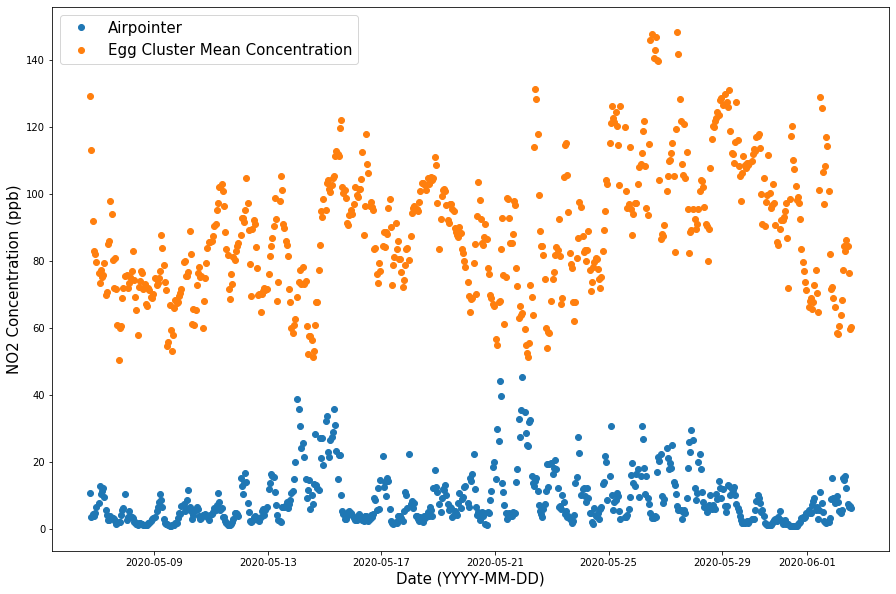

In [44]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(dataframe.index.to_series(), dataframe['NO2[ppb]'], 'o', label="Egg Cluster Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

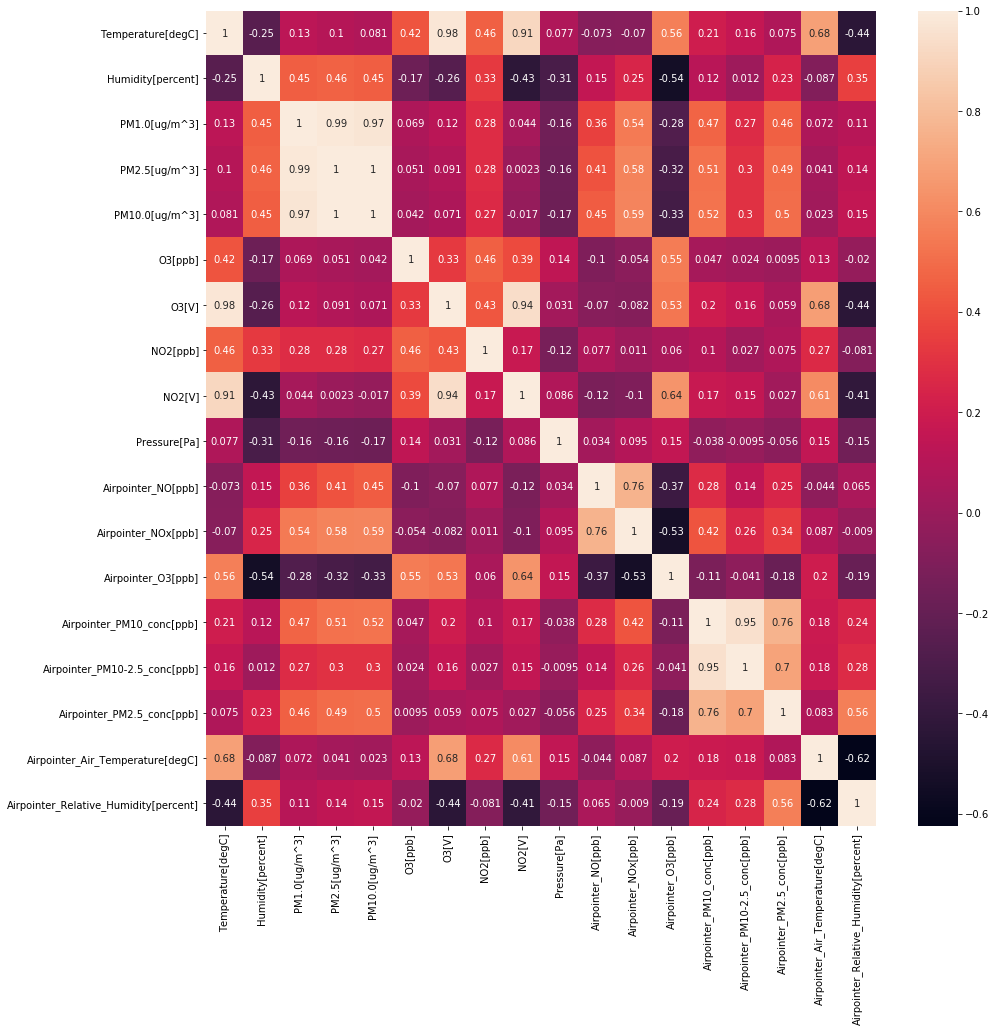

In [45]:
dataframe_new = dataframe.drop(columns=['Airpointer_NO2[ppb]'])
corrMatrix = dataframe_new.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()